# 📊 **2023年 日本コンビニ市場分析レポート**

**作成者**：IP SAU WA 　❘ **日付**：2025年8月　❘ **バージョン**：v1.0

---

## 1. はじめに
本レポートは、ポートフォリオ用に作成したサンプルです。  
**データ分析スキル** と **戦略的思考力** の両方を示すことを目的としています。  

- 想定読者  
  - 経営層（戦略方針決定の参考）  
  - 事業部長・マーケティング部門（施策検討の参考）  
- 想定テーマ  
  - 日本のコンビニ市場における現状分析と成長戦略の方向性  

## 2. プロジェクト目的

日本全国における主要コンビニチェーンの店舗分布、市場シェア、売上推移を分析し、出店戦略・商品施策・業界競争環境の可視化と改善提案を行う。

## 3. 使用技術・データソース

- Python: pandas, matplotlib, seaborn, numpy, plotly
- データ抽出・前処理・可視化（コード例:下記参照）
- データソース：
  - `prefecture_store_counts.csv`：都道府県ごとのコンビニ店舗数  
  - `monthly_sales.csv`：コンビニの月別売上データ
    
※本レポートのデータは、経済産業省「商業動態統計」のオープンデータを参考に、AIが模擬的に生成・加工したサンプルを使用しています。

## 4. エグゼクティブサマリー

- 日本のコンビニ市場は **成熟局面** にあり、店舗数は横ばい  
- 上位3社で約8割を占有する **寡占市場**  
- 今後の成長のカギは以下の3点  
  1. **差別化戦略**：健康志向商品・デジタルサービス  
  2. **地域戦略**：都市部過密エリアと地方未開拓エリアの二極対応  
  3. **効率改善**：出店最適化と既存店強化


## 5. 分析ストーリー （全体構成）
### i. 全国市場構造把握
- 主要3ブランドのシェアと寡占度を**円グラフ**で可視化
- 競争環境・参入障壁の洞察／施策提案

### ii. 人口調整済み店舗密度分析
- 人口100万人あたり店舗数（地域別）を**マップ**で見える化
- 成長可能性・飽和状況の戦略解釈／重点ターゲット抽出

### iii. 都市別競争状況（Top 5都道府県）
- 店舗数**積み上げ棒グラフ**（都道府県×ブランド）
- 地域差・ブランド優位性／施策・戦略示唆

### iv. 月別売上推移分析（ブランド別季節傾向）
- 月次売上**折れ線グラフ**＋季節性・ブランド特徴
- 販促・出店タイミング・差別化案




In [21]:
# 設定とデータ読み込み

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 日本語フォント設定
import matplotlib
matplotlib.rcParams['font.family'] = 'Meiryo'

# ブランド別カラー設定
brand_colors = {
    "7-Eleven": "#E74C3C",    # 赤
    "FamilyMart": "#27AE60",  # 緑
    "Lawson": "#2980B9"       # 青
}

# 都道府県マッピング
prefecture_jp = {
    "Hokkaido": "北海道", "Aomori": "青森県", "Iwate": "岩手県", "Miyagi": "宮城県", "Akita": "秋田県",
    "Yamagata": "山形県", "Fukushima": "福島県", "Ibaraki": "茨城県", "Tochigi": "栃木県", "Gunma": "群馬県",
    "Saitama": "埼玉県", "Chiba": "千葉県", "Tokyo": "東京都", "Kanagawa": "神奈川県", "Niigata": "新潟県",
    "Toyama": "富山県", "Ishikawa": "石川県", "Fukui": "福井県", "Yamanashi": "山梨県", "Nagano": "長野県",
    "Gifu": "岐阜県", "Shizuoka": "静岡県", "Aichi": "愛知県", "Mie": "三重県", "Shiga": "滋賀県",
    "Kyoto": "京都府", "Osaka": "大阪府", "Hyogo": "兵庫県", "Nara": "奈良県", "Wakayama": "和歌山県",
    "Tottori": "鳥取県", "Shimane": "島根県", "Okayama": "岡山県", "Hiroshima": "広島県", "Yamaguchi": "山口県",
    "Tokushima": "徳島県", "Kagawa": "香川県", "Ehime": "愛媛県", "Kochi": "高知県", "Fukuoka": "福岡県",
    "Saga": "佐賀県", "Nagasaki": "長崎県", "Kumamoto": "熊本県", "Oita": "大分県", "Miyazaki": "宮崎県",
    "Kagoshima": "鹿児島県", "Okinawa": "沖縄県"
}

# データ読み込み
stores_df = pd.read_csv("prefecture_store_counts.csv")
sales_df = pd.read_csv("monthly_sales.csv")

# 日本語県名を追加
stores_df["Prefecture_JP"] = stores_df["Prefecture"].map(prefecture_jp)



## 6. 分析アウトプット例（概要＋洞察）

### i. **市場構造の把握：全国コンビニ店舗数約７割を占有する上位3ブランドのシェア分析**

### 🎯 本章の目的
主要ブランドの全国シェアを把握し、市場の寡占状況と競争構造を明確にする。

### 🔍 洞察
- 全国コンビニ店舗数約７割を占有する上位3ブランドのシェア：セブン-イレブン（約40%）、ファミリーマート（約34%）、ローソン（約26%）

### 💡 商業的示唆
- 新規参入は困難、差別化戦略が必須
- 地域密着型ブランド戦略の可能性

### 🗺️ 可視化結果

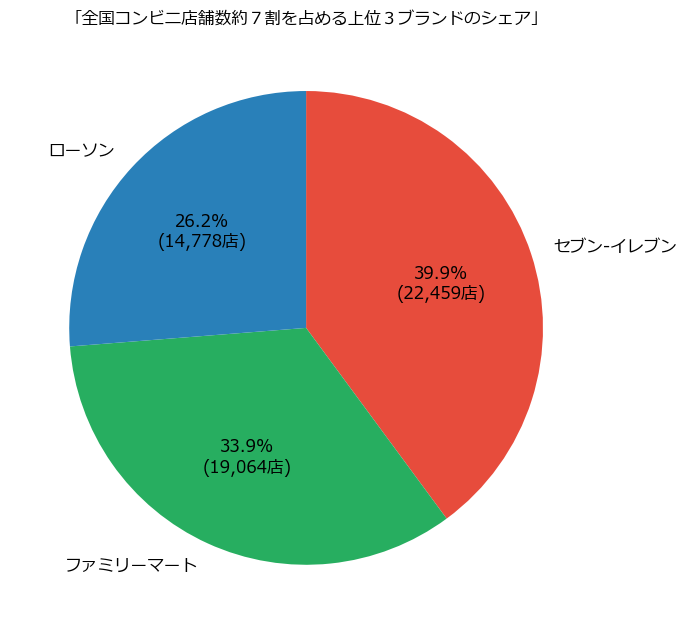

In [22]:

# i. 市場構造の把握：全国コンビニ店舗数約７割を占有する上位3ブランドのシェア分析（円グラフ）

brand_totals = stores_df.groupby("Brand")["Stores"].sum()
brand_labels_jp = {"7-Eleven": "セブン-イレブン", "FamilyMart": "ファミリーマート", "Lawson": "ローソン"}

def my_autopct(pct):
    total = brand_totals.sum()
    absolute = int(round(pct/100.*total))
    return f"{pct:.1f}%\n({absolute:,}店)"

plt.figure(figsize=(7,7))
plt.pie(
    brand_totals,
    labels=[brand_labels_jp[b] for b in brand_totals.index],
    colors=[brand_colors[b] for b in brand_totals.index],
    startangle=90,
    counterclock=False,
    autopct=my_autopct,
    textprops={'fontsize': 12}
) 
plt.title("「全国コンビニ店舗数約７割を占める上位３ブランドのシェア」")
plt.tight_layout()
plt.show()





### ii. **出店戦略基盤：人口調整済み店舗密度分析**

### 🎯 本章の目的
全国の主要コンビニチェーンの店舗分布を人口調整密度で可視化し、地域ごとの出店状況と偏りを把握することで、企業の出店戦略に資する基盤情報を提供する。

### 🔍 洞察  
- 都市部（東京都・神奈川県・大阪府など）では密度が高く、競合が激しい  
- 地方県でも生活インフラとして店舗密度が高い地域が存在  
- 人口調整により、単純な店舗数では見えない出店余地が浮かび上がる

### 🧭 出店戦略の示唆と提案

人口調整による店舗密度分析は、単なる現状把握ではなく、**将来の出店戦略を設計するための基盤情報**として活用できます。
以下に、分析結果から導かれる戦略的示唆と具体的な提案を整理します。

### 🗺️ 可視化結果

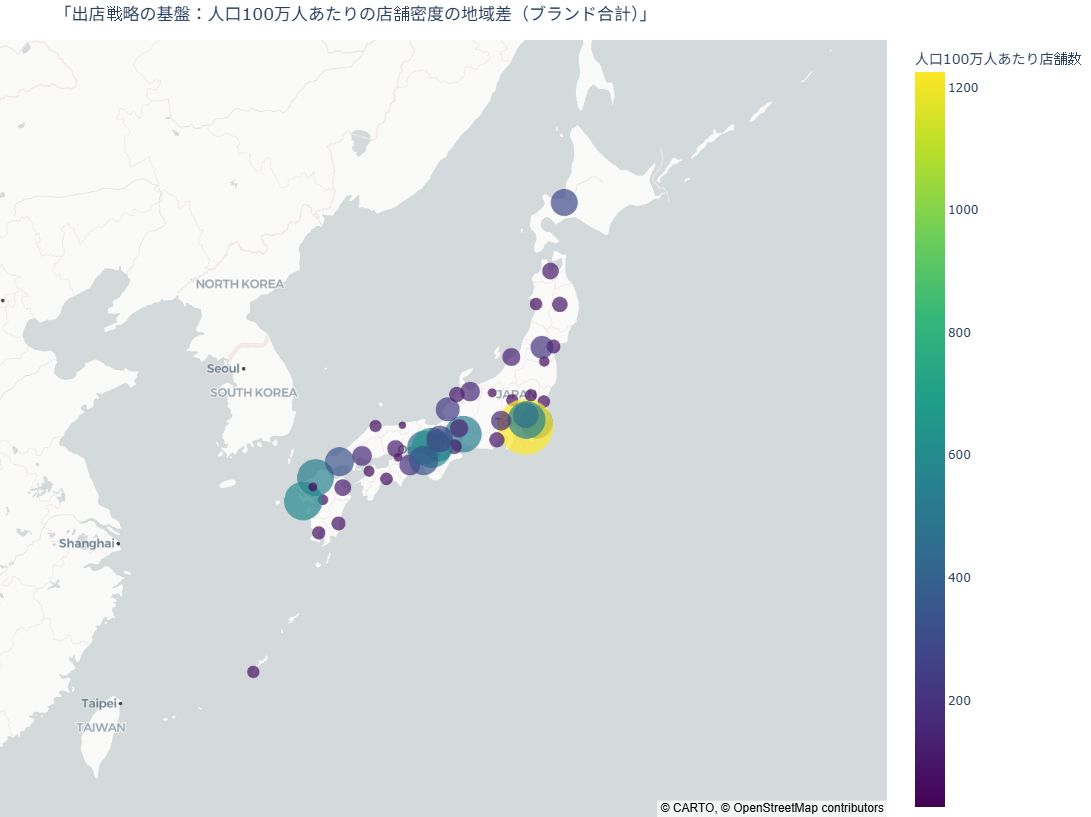

In [23]:
import pandas as pd
import plotly.express as px

# CSVファイルを読み込み
df = pd.read_csv("prefecture_store_counts.csv")

# 都道府県ごとの店舗数をブランド合計で集計
df_total = df.groupby(["Prefecture", "Population"], as_index=False)["Stores"].sum()

# 人口100万人あたりの店舗密度を計算
df_total["人口100万人あたり店舗数"] = df_total["Stores"] / (df_total["Population"] / 1_000_000)

# 都道府県の緯度・経度を追加（代表座標）
# 備註：実務ではジオコーディングAPI等で取得可能
pref_coords = {
    "Hokkaido": (43.06417, 141.34694), "Aomori": (40.82444, 140.74), "Iwate": (39.70361, 141.1525),
    "Miyagi": (38.26889, 140.87222), "Akita": (39.71861, 140.1025), "Yamagata": (38.24056, 140.36333),
    "Fukushima": (37.75, 140.46778), "Ibaraki": (36.34139, 140.44667), "Tochigi": (36.56583, 139.88361),
    "Gunma": (36.39111, 139.06083), "Saitama": (35.85694, 139.64889), "Chiba": (35.60472, 140.12333),
    "Tokyo": (35.68944, 139.69167), "Kanagawa": (35.44778, 139.6425), "Niigata": (37.90222, 139.02361),
    "Toyama": (36.69528, 137.21139), "Ishikawa": (36.59444, 136.62556), "Fukui": (36.06528, 136.22194),
    "Yamanashi": (35.66389, 138.56833), "Nagano": (36.65139, 138.18111), "Gifu": (35.39111, 136.72222),
    "Shizuoka": (34.97694, 138.38306), "Aichi": (35.18028, 136.90667), "Mie": (34.73028, 136.50861),
    "Shiga": (35.00444, 135.86833), "Kyoto": (35.02139, 135.75556), "Osaka": (34.68639, 135.52),
    "Hyogo": (34.69139, 135.18306), "Nara": (34.68528, 135.83278), "Wakayama": (34.22611, 135.1675),
    "Tottori": (35.50111, 134.235), "Shimane": (35.47222, 133.05056), "Okayama": (34.66167, 133.935),
    "Hiroshima": (34.39639, 132.45944), "Yamaguchi": (34.18583, 131.47139), "Tokushima": (34.06583, 134.55944),
    "Kagawa": (34.34028, 134.04333), "Ehime": (33.84167, 132.76611), "Kochi": (33.55972, 133.53111),
    "Fukuoka": (33.60639, 130.41806), "Saga": (33.26361, 130.30083), "Nagasaki": (32.74472, 129.87361),
    "Kumamoto": (32.78972, 130.74167), "Oita": (33.23806, 131.6125), "Miyazaki": (31.91111, 131.42389),
    "Kagoshima": (31.56028, 130.55806), "Okinawa": (26.2125, 127.68111)
}


prefecture_jp = {
    "Hokkaido": "北海道", "Aomori": "青森県", "Iwate": "岩手県", "Miyagi": "宮城県", "Akita": "秋田県",
    "Yamagata": "山形県", "Fukushima": "福島県", "Ibaraki": "茨城県", "Tochigi": "栃木県", "Gunma": "群馬県",
    "Saitama": "埼玉県", "Chiba": "千葉県", "Tokyo": "東京都", "Kanagawa": "神奈川県", "Niigata": "新潟県",
    "Toyama": "富山県", "Ishikawa": "石川県", "Fukui": "福井県", "Yamanashi": "山梨県", "Nagano": "長野県",
    "Gifu": "岐阜県", "Shizuoka": "静岡県", "Aichi": "愛知県", "Mie": "三重県", "Shiga": "滋賀県",
    "Kyoto": "京都府", "Osaka": "大阪府", "Hyogo": "兵庫県", "Nara": "奈良県", "Wakayama": "和歌山県",
    "Tottori": "鳥取県", "Shimane": "島根県", "Okayama": "岡山県", "Hiroshima": "広島県", "Yamaguchi": "山口県",
    "Tokushima": "徳島県", "Kagawa": "香川県", "Ehime": "愛媛県", "Kochi": "高知県", "Fukuoka": "福岡県",
    "Saga": "佐賀県", "Nagasaki": "長崎県", "Kumamoto": "熊本県", "Oita": "大分県", "Miyazaki": "宮崎県",
    "Kagoshima": "鹿児島県", "Okinawa": "沖縄県"
}

#日本語地名列を追加
df_total["都道府県（日本語）"] = df_total["Prefecture"].map(prefecture_jp)

# 緯度・経度をマージ
df_total["緯度"] = df_total["Prefecture"].map(lambda x: pref_coords.get(x, (None, None))[0])
df_total["経度"] = df_total["Prefecture"].map(lambda x: pref_coords.get(x, (None, None))[1])


# 日本語ラベル付きの列を追加
df_total["人口（百万人）"] = (df_total["Population"] / 1_000_000).round(2).astype(str) + " 百万人"
df_total["店舗数（合計）"] = df_total["Stores"].astype(str) + " 店舗"
df_total["人口100万人あたり店舗数（密度）"] = df_total["人口100万人あたり店舗数"].round(1).astype(str) + " 店舗/百万人"

# 地図を描画（密度に応じて円のサイズと色を調整）
fig = px.scatter_map(
    df_total,
    lat="緯度",
    lon="経度",
    size="人口100万人あたり店舗数",  # 備註：円のサイズは密度に比例
    color="人口100万人あたり店舗数",  # 備註：色も密度に応じて変化
    hover_name="都道府県（日本語）",  # ← 日本語地名を表示
    hover_data={
        "店舗数（合計）": True,
        "人口（百万人）": True,
        "人口100万人あたり店舗数（密度）": True
    },
    size_max=40,
    zoom=4,
    height=800,
    color_continuous_scale="Viridis" # 備註：色階はViridisで視認性を強化
)

# 地図のスタイルとレイアウトを調整
fig.update_layout(
    map_style="carto-positron",  # 備註：背景地図のスタイル
    title="「出店戦略の基盤：人口100万人あたりの店舗密度の地域差（ブランド合計）」",
    margin={"r":0, "t":40, "l":0, "b":0}
)

# 地図を表示
fig.show()


### iii. **都市別競争状況（Top 5都道府県）**

### 🎯 本章の目的
店舗数上位の都道府県を特定し、主要競争エリアを明示する。

### 🔍 洞察
- 東京都、大阪府、神奈川県、愛知県、埼玉県が主要 Top 5 競争市場
- 都市部にブランドが集中
  
### 💡 商業的示唆

#### 1. 都市部における競争の激化
- 主要ブランドが東京都・大阪府などに集中しており、出店戦略の差別化が重要となる。

#### 2. 地域別ブランド優位性の把握
- 都道府県ごとにブランドの店舗数に偏りが見られ、地域特性に応じた戦略立案が求められる。

#### 3. 飽和市場における戦略転換
- 店舗数の拡大よりも、既存店舗のサービス品質や顧客体験の向上が競争力の鍵となる。

#### 4. 地域密着型施策の展開可能性
- 地方の消費者ニーズに合わせた商品・キャンペーン展開がブランド強化につながる。

### 🗺️ 可視化結果


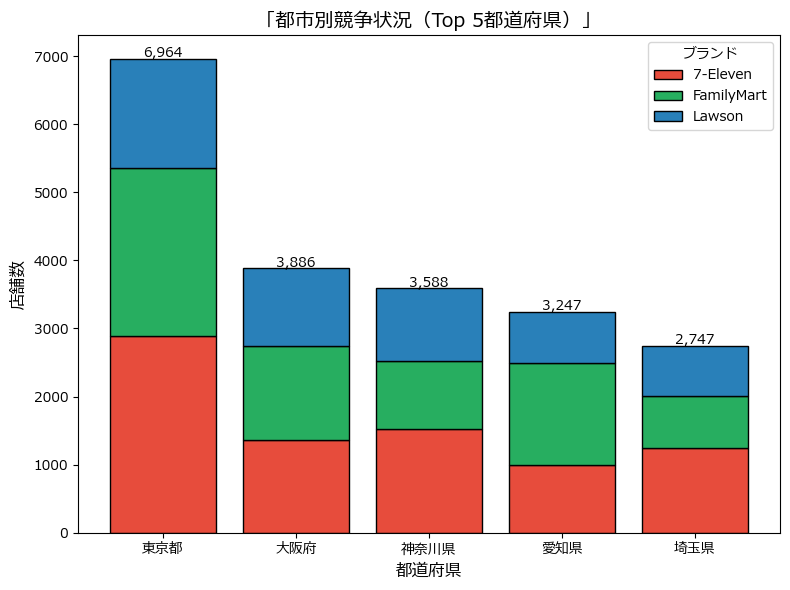

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# ブランドフィルター
major_brands = ["7-Eleven", "FamilyMart", "Lawson"]
filtered_df = stores_df[stores_df["Brand"].isin(major_brands)].copy()

# 日本語県名を追加
filtered_df["Prefecture_JP"] = filtered_df["Prefecture"].map(prefecture_jp)

# 都道府県別・ブランド別の店舗数を集計
grouped = filtered_df.groupby(["Prefecture_JP", "Brand"])["Stores"].sum().unstack().fillna(0)

# 店舗数トップ5都道府県を抽出（合計でソート）
top5_pref = grouped.sum(axis=1).sort_values(ascending=False).head(5).index
top5_df = grouped.loc[top5_pref]

# ブランド別カラー設定
brand_colors = {
    "7-Eleven": "#E74C3C",    # 赤
    "FamilyMart": "#27AE60",  # 緑
    "Lawson": "#2980B9"       # 青
}

# 縦棒グラフ（積み上げ）を描画
plt.figure(figsize=(8,6))
bottom = [0] * len(top5_df)
for brand in major_brands:
    plt.bar(top5_df.index, top5_df[brand], bottom=bottom, label=brand, color=brand_colors[brand], edgecolor="black")
    bottom = bottom + top5_df[brand]

# 合計ラベル追加
total_counts = top5_df.sum(axis=1)
for i, total in enumerate(total_counts):
    plt.text(i, total + 20, f"{int(total):,}", ha='center', fontsize=10)

plt.title("「都市別競争状況（Top 5都道府県）」", fontsize=14)
plt.xlabel("都道府県", fontsize=12)
plt.ylabel("店舗数", fontsize=12)
plt.legend(title="ブランド")
plt.tight_layout()
plt.show()


### iv. **月別売上推移分析（ブランド別季節傾向）**

### 🎯 本章の目的  
各ブランドの月別売上傾向を把握し、季節性・ブランド特性を踏まえた出店および販促戦略の方向性を検討する。

### 🔍 洞察  
- **7-Eleven** は年間を通じて安定した売上を維持しており、特に夏季に強みが見られる。  
- **FamilyMart** は年末年始に売上が伸びる傾向があり、季節イベントとの連動が効果的。  
- **Lawson** は春〜初夏にかけて売上が上昇しており、新生活需要との相性が良い可能性。  
- 全ブランドともに**季節変動の影響を受けており、月別の売上差が戦略設計に直結する。**

### 🧭 出店戦略の示唆と提案

#### 1. 季節性を活かした出店タイミングの最適化  
- ブランドごとの売上ピークに合わせて、**短期集中型の出店・販促施策**を展開することでROIを最大化。

#### 2. 地域別×季節別の売上分析による精緻な戦略立案  
- 地域ごとの気候・イベントと売上傾向を掛け合わせた**マイクロマーケティング戦略**が有効。

#### 3. 売上が低迷する月への対策強化  
- 売上が落ち込む月には、**限定商品・キャンペーン・店内体験の強化**により底上げを図る。

#### 4. ブランド特性に応じた販促メッセージの最適化  
- 例：FamilyMartは「年末の便利さ」、Lawsonは「春の新生活応援」など、**季節感ある訴求軸**を明確化。

### 🗺️ 可視化結果


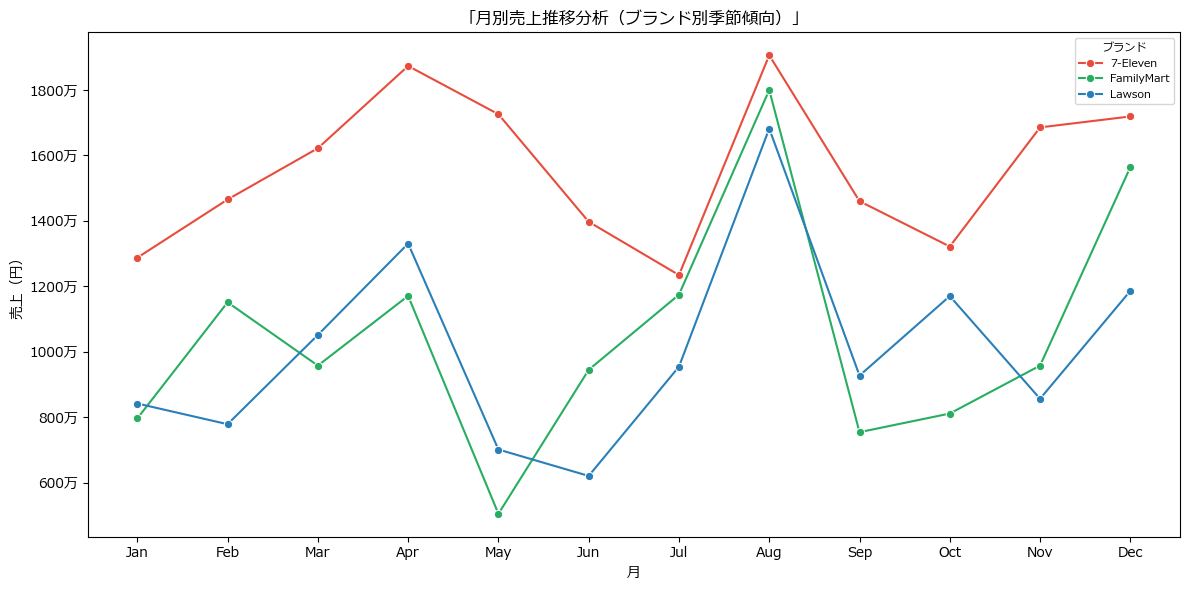

In [35]:
# 月名の順序を指定してカテゴリ型に変換
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

sales_df["Month"] = pd.Categorical(sales_df["Month"], categories=month_order, ordered=True)


plt.figure(figsize=(12,6))
sns.lineplot(
    data=sales_df,
    x="Month",
    y="Sales_JPY",
    hue="Brand",
    palette=brand_colors,
    marker="o"
)

plt.title("「月別売上推移分析（ブランド別季節傾向）」")
plt.ylabel("売上（円）")
plt.xlabel("月")
plt.legend(title="ブランド", fontsize=8, title_fontsize=8)

# Y軸の単位を万単位に変更
def format_yen(x, pos):
    return f"{x/1e4:.0f}万"
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_yen))

plt.tight_layout()
plt.show()


## 7. まとめ

**【結論】**
- 大都市圏（東京・大阪・愛知）に店舗が集中
- セブン-イレブンは店舗数・売上ともに優位
- 売上に季節性があり、夏季がピーク
- データ分析により、戦略提案を裏付けることが可能
- コンビニ市場は成熟しているが、差別化・地域戦略・効率改善 により成長余地あり

**【今後の分析案】**
- 都市部と地方での売上効率（1店舗あたり売上）の比較
- 過去10年のブランド拡大傾向の時系列分析

### 付録

- 使用ライブラリ: pandas, matplotlib, seaborn, numpy, plotly
- データソース: 経産省「商業動態統計」、オープンデータを参考  
- 本レポートのデータは、AIにより模擬的に生成・加工したサンプルを使用  
- 実務では公開データや企業データに基づいた分析設計が可能
- 注意: 本資料は実務案件ではなく、ポートフォリオ用に作成したサンプルです

